<a href="https://www.kaggle.com/code/yigitkasapoglu/house-price-eda-prediction-with-bayesian-ridge?scriptVersionId=164178198" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# House Price Prediction Using Machine Learning

## Summary
This project aims to develop a predictive model for house prices using machine learning techniques. Leveraging a dataset containing various features such as overall quality, square footage, and neighborhood, the goal is to accurately predict the sale price of houses. Through data preprocessing, feature engineering, model selection, and evaluation, the project seeks to provide insights and predictions valuable for stakeholders in the real estate industry.

## Business Objective
The primary objective of this project is to assist real estate stakeholders, including buyers, sellers, and investors, in making informed decisions regarding property transactions. By accurately predicting house prices based on key features, such as location, size, and quality, the model can aid in pricing strategies, investment analysis, and risk assessment. Ultimately, the project aims to contribute to more efficient and transparent real estate markets.

## Description of Sections
1. **Setup and Libraries Installation**: Installation of necessary libraries such as numpy, pandas, matplotlib, seaborn, and sklearn to facilitate data analysis and modeling.
2. **Data Preprocessing and Exploration**: Loading the dataset into a pandas DataFrame, exploring its structure and features, and addressing missing values and outliers.
3. **Data Cleaning**: Preparing the dataset for analysis by converting data types, filling missing values, and dropping unnecessary columns.
4. **Feature Engineering**: Creating new features based on existing ones to enhance the predictive power of the model.
5. **Data Transformation**: Transforming data through skewness correction and encoding categorical variables for modeling.
6. **Model Selection and Training**: Comparing the performance of different machine learning models and selecting the best-performing one for training.
7. **Model Evaluation**: Evaluating the selected model's performance through cross-validation and calculating various metrics such as Mean Absolute Error (MAE) and R-squared (R²).
8. **Training Top Models**: Training the top-performing models and evaluating their performance on both base and final datasets.

## Results
The project successfully developed a predictive model for house prices, achieving good performance metrics such as low MAE and high R² values. The selected model demonstrates robustness and accuracy in predicting house prices, providing valuable insights for stakeholders in the real estate industry.


# Setup Environment

In [1]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | / done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.3 MB/s eta 

In [2]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# Models
from sklearn.linear_model import BayesianRidge, OrthogonalMatchingPursuit
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb


from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split


# Model Selection
from pycaret.regression import setup, compare_models

# pd.set_option('display.max_rows', None) # Disable truncation of isnull().sum()

In [4]:
##Assign dataset to df

df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Explore Data

In [5]:
# Check data shape
df.shape

(1460, 81)

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data has 43 objects, 35 integers and 3 float data.

In [9]:
# Display the sum of null values for each column
df.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

<Axes: >

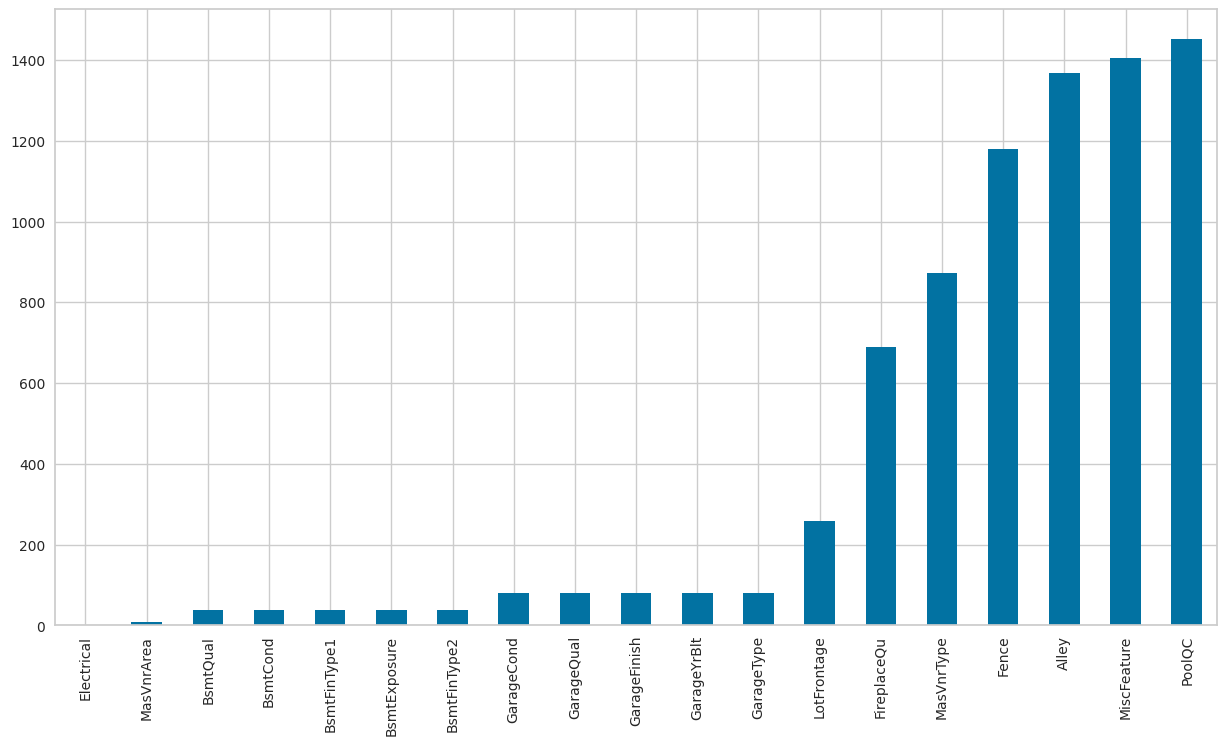

In [11]:
# Visualize NA values
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.figure(figsize=(15,8))
missing.plot.bar()

<Axes: >

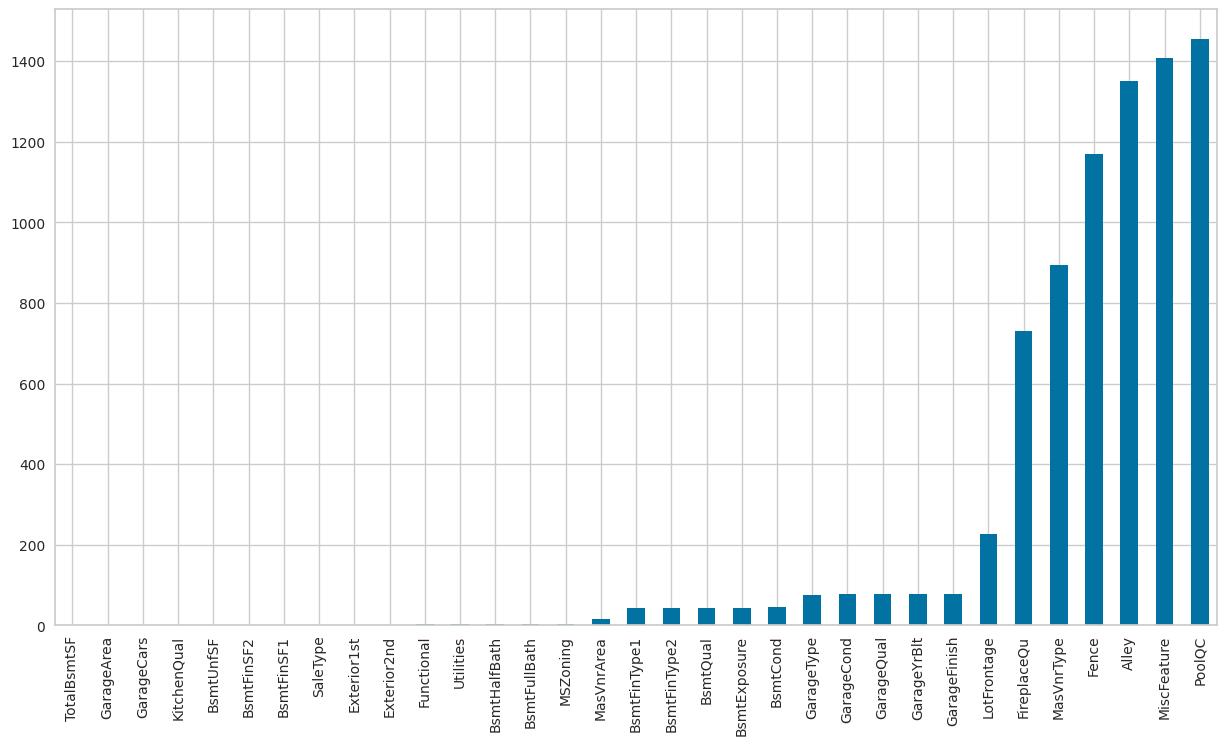

In [12]:
# Visualize NA values in test data frame
missing = df_test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.figure(figsize=(15,8))
missing.plot.bar()

## Issues Found:

- Some NA values are falsely identified, appearing as missing data but actually representing assigned categories. To address this, we'll convert non-numeric NAs to categorical 'None' values, while numerical NAs will be imputed using KNN Regressor.

- The `MSSubClass` feature is currently stored as an integer, but it should be treated as categorical. We'll convert its data type to object accordingly.

- Outliers need to be identified and addressed in subsequent steps.

- The `Id` column serves no meaningful purpose for our analysis and will be dropped.


# Data Cleaning

## Convert MSSubClass to str data type

In [13]:
df['MSSubClass'] = df['MSSubClass'].astype('str') # Convert MSSubClass to str object
df_test['MSSubClass'] = df['MSSubClass'].astype('str') # Convert MSSubClass to str object


In [14]:
df2 = df.copy()
df_test2 = df_test.copy()

## Fill Categorical NAs:

Replace categorical values with assigned descriptions with 'None'. For other categorical values, use the mode of the respective column for filling missing values.


In [15]:
# Impute using a constant value - If NA value is included in description as a category, fill it with 'None'
for column in ['Alley',
               'BsmtQual',
               'BsmtCond',
               'BsmtExposure',
               'BsmtFinType1',
               'BsmtFinType2',
               'FireplaceQu',
               'GarageType', 
               'GarageFinish',
               'GarageQual',
               'GarageCond',
               'PoolQC',
               'Fence',
               'MiscFeature',
]:
    df2[column] = df2[column].fillna('None')

# Impute using the column mode - If NA value is not included in description, fill with mode
for column in ['MSZoning',
               'Utilities',
               'Exterior1st',
               'Exterior2nd',
               'MasVnrType',
               'Electrical',
               'KitchenQual',
               'Functional',
               'SaleType'    
]:
    df2[column] = df2[column].fillna(df2[column].mode()[0]) ## We use [0] because mode can return multiple values

In [16]:
# Impute using a constant value - If NA value is included in description as a category, fill it with 'None'
for column in ['Alley',
               'BsmtQual',
               'BsmtCond',
               'BsmtExposure',
               'BsmtFinType1',
               'BsmtFinType2',
               'FireplaceQu',
               'GarageType', 
               'GarageFinish',
               'GarageQual',
               'GarageCond',
               'PoolQC',
               'Fence',
               'MiscFeature',
]:
    df_test2[column] = df_test2[column].fillna('None')

# Impute using the column mode - If NA value is not included in description, fill with mode
for column in ['MSZoning',
               'Utilities',
               'Exterior1st',
               'Exterior2nd',
               'MasVnrType',
               'Electrical',
               'KitchenQual',
               'Functional',
               'SaleType'    
]:
    df_test2[column] = df_test2[column].fillna(df_test2[column].mode()[0]) ## We use [0] because mode can return multiple values

In [17]:
## Return all 'object' columns with at least 1 missing value

df2.select_dtypes('object').loc[:, df2.isna().sum() > 0].columns 

Index([], dtype='object')

In [18]:
df_test2.select_dtypes('object').loc[:, df_test2.isna().sum() > 0].columns 

Index([], dtype='object')

In [19]:
## Check NAs of Object data types after imputation

df2.select_dtypes('object').isna().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [20]:
df_test2.select_dtypes('object').isna().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

### Output Confirmation: Object NAs Filled

The output confirms that missing values in object-type columns have been successfully filled.


## Drop 'Id' Column

In [21]:
df2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [22]:
df2 = df2.drop(['Id'], axis = 1)
df_test2 = df_test2.drop('Id', axis=1)

In [23]:
df2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2010,WD,Normal,142125


## Fill Missing Values for Numerical Features

In [24]:
df2.select_dtypes(np.number).isna().sum()

LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [25]:
df3 = df2.copy()
df_test3 = df_test2.copy()

In [26]:
neighborhood_counts = df3['Neighborhood'].value_counts()
print(neighborhood_counts)


Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64


## Filling NAs with KNN Regressor

In this step, we utilize Scikit-Learn's KNN Regressor method to fill missing values (NAs) in numerical features. It's important to note that KNN regressor can only be applied to numerical values. Thus, we exclusively address numerical columns during this process.


In [27]:
def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns ## Columns with no missing values
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target] # All values of na_target that do not have missing values
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns] # All values of non_na_columns that do not have missing values
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns] #  Rest of the data that do not have missing values
    
    knn = KNeighborsRegressor() # Assign KneighborsRegressor() to knn
    knn.fit(X_train, y_train) # Call regressor to fit missing values
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred # Fill missing values with y_train prediction based on KNeighbor Regression.
    
    # Basically, we filled all numerical missing values based on k-nearest neighbors of respective values and columns
    
    return df

In [28]:
df3.columns[df3.isna().sum() > 0]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [29]:
df_test3.columns[df_test3.isna().sum() > 0]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

### The code provided below should be executed only once, as it fills all missing values in the dataset. Attempting to run it multiple times will result in errors if no missing values are found.

In [30]:
for column in [
                'GarageYrBlt',
                'LotFrontage',
                'MasVnrArea'
              ]:
    df3 = knn_impute(df3, column)
# Call KNeighborsRegressor() to fill NA values in numeric columns using k-nearest neighbors regression

In [31]:
for column in ['LotFrontage',
            'MasVnrArea',
            'BsmtFinSF1',
            'BsmtFinSF2',
            'BsmtUnfSF',
            'TotalBsmtSF',
            'BsmtFullBath',
            'BsmtHalfBath',
            'GarageYrBlt',
            'GarageCars',
            'GarageArea'
           ]:
    df_test3 = knn_impute(df_test3, column)

In [32]:
df3.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [33]:
df_test3.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

### Numerical Missing Values Filled Using KNN Regressor

The missing numerical values have been filled using the KNN Regressor method. The output above confirms that there are no more missing values remaining.



## Check Correlation

In [34]:
num_features = df3.select_dtypes(include=[np.number]) # Assign numeric columns

num_features.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [35]:
cat_features = df3.select_dtypes('object') # Assign categorical object columns
cat_features.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

### Correlations List

In [36]:
correlation = num_features.corr() # Return correlation for numerical features
print(correlation['SalePrice'].sort_values(ascending = False)) # Print value correlation with SalePrice on a descending list

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
GarageYrBlt      0.512122
YearRemodAdd     0.507101
MasVnrArea       0.479311
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.357074
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


### Correlations Heatmap For All Numerical Columns

<Axes: title={'center': 'Correlation of Numeric Features with Sale Price'}>

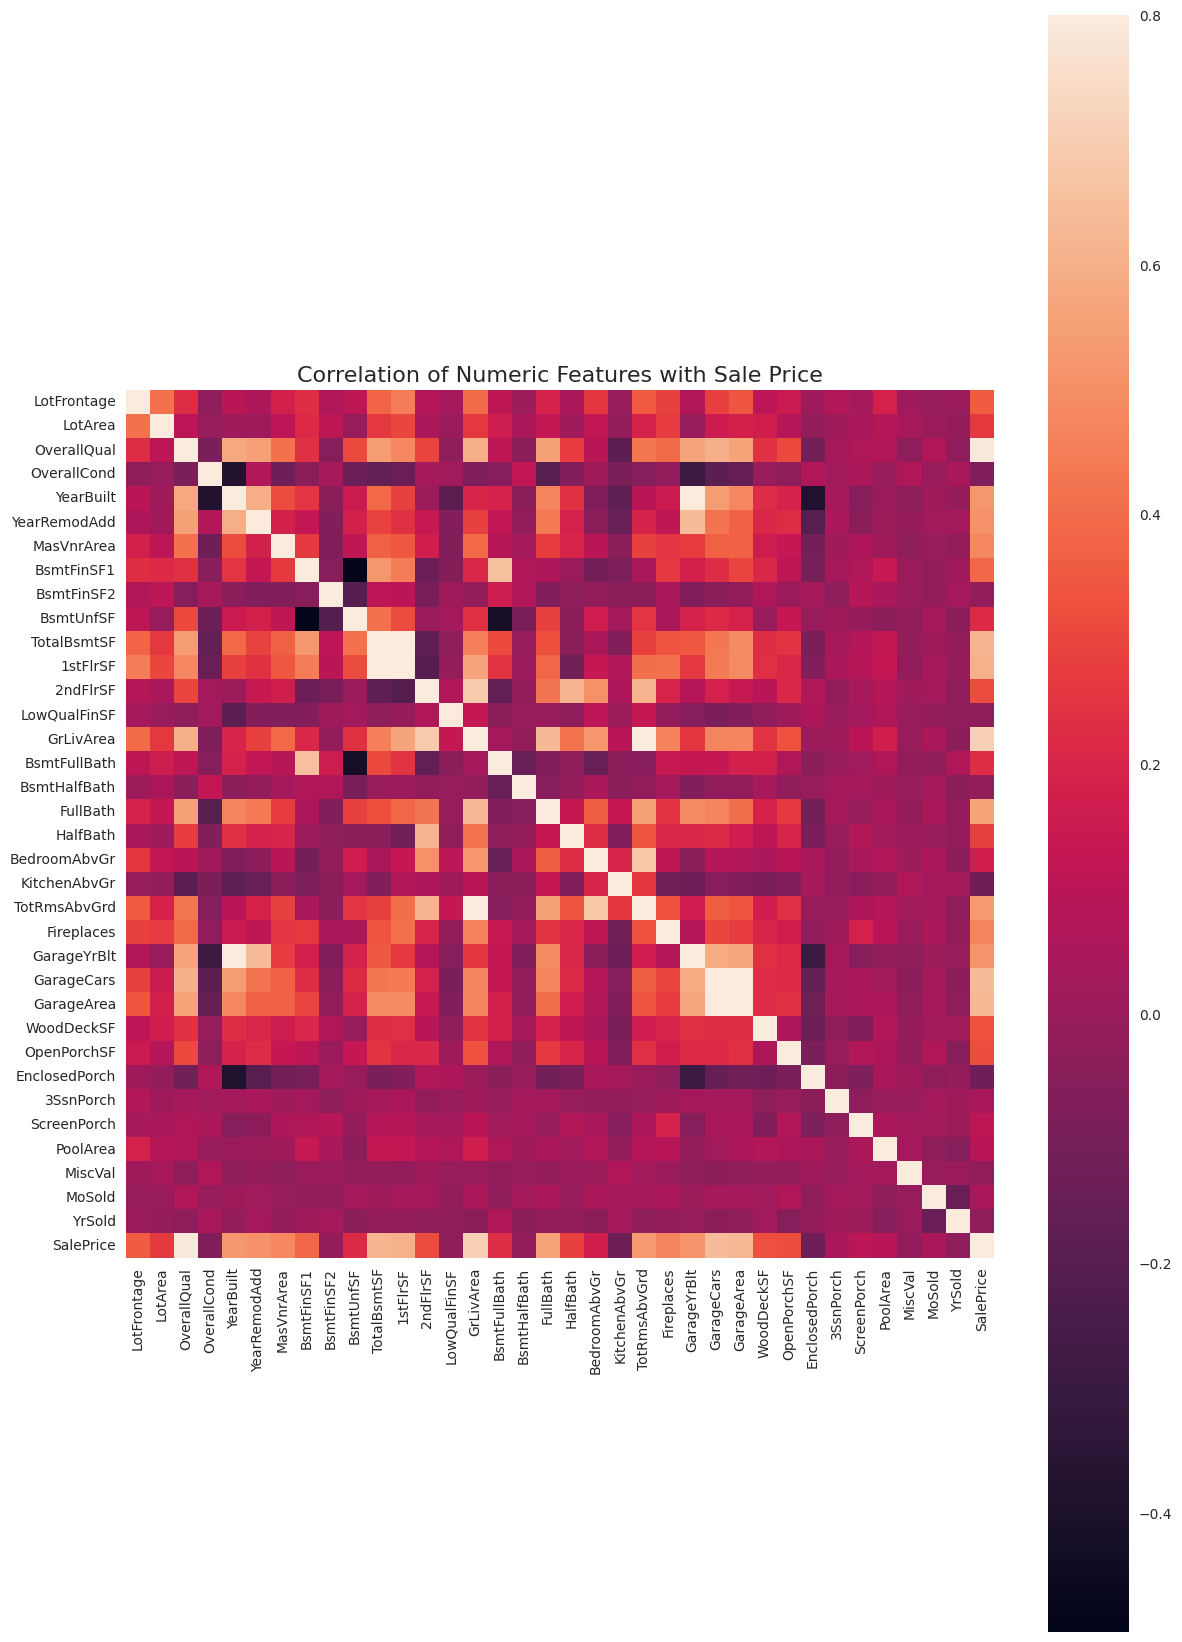

In [37]:
f , ax = plt.subplots(figsize = (14,21))

plt.title('Correlation of Numeric Features with Sale Price', y=1, size=16 )

sns.heatmap(correlation, square = True, vmax = 0.8)

### Lighter boxes have higher correlation, while darker boxes have lower correlation. Fully dark boxes indicate high negative correlation, which can also provide valuable insights.


### Correlation Heatmap For Highest Correlated Columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'GarageYrBlt', 'YearRemodAdd'],
      dtype='object')


<Axes: >

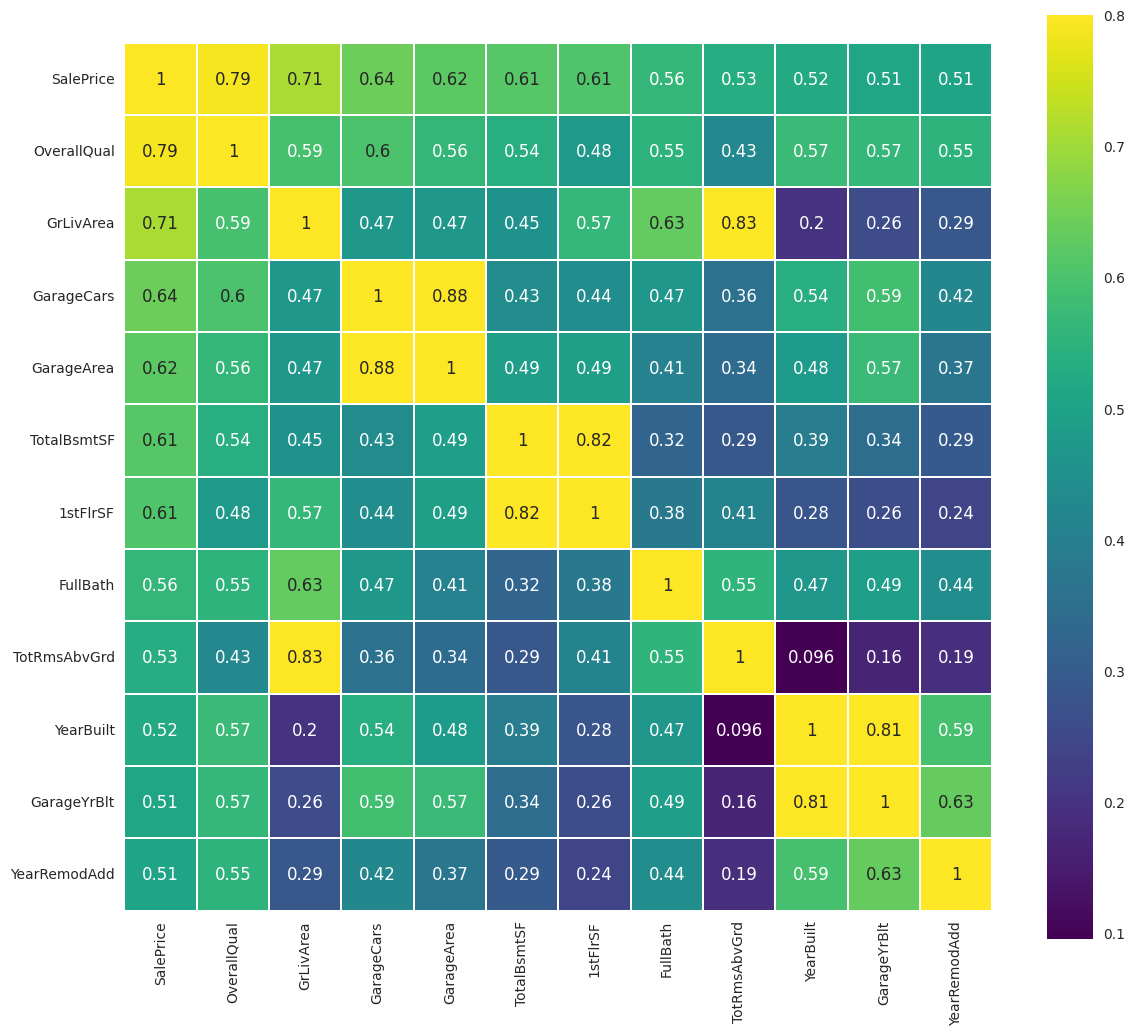

In [38]:
k = 12
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(df3[cols].values.T)
f , ax = plt.subplots(figsize = (14, 12))
sns.heatmap(cm, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis',
           linecolor='white', xticklabels=cols.values, annot_kws={'size':12},yticklabels=cols.values)

- We are using the top 12 columns since they have a correlation above 0.5 with SalePrice.

- GarageCars and GarageArea show multicollinearity as they are correlated to each other with a rate of 0.88. We will remove GarageArea since it provides the same data as GarageCars, but GarageCars has a higher correlation with SalePrice. This way, we will increase model precision and reduce randomness.

In [39]:
df4 = df3.copy()
df4 = df4.drop('GarageArea', axis=1) # Drop GarageArea
df4.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Op

In [40]:
df_test4 = df_test3.copy()
df_test4 = df_test4.drop('GarageArea', axis=1) # Drop GarageArea
df_test4.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Op

## Scatter Plots

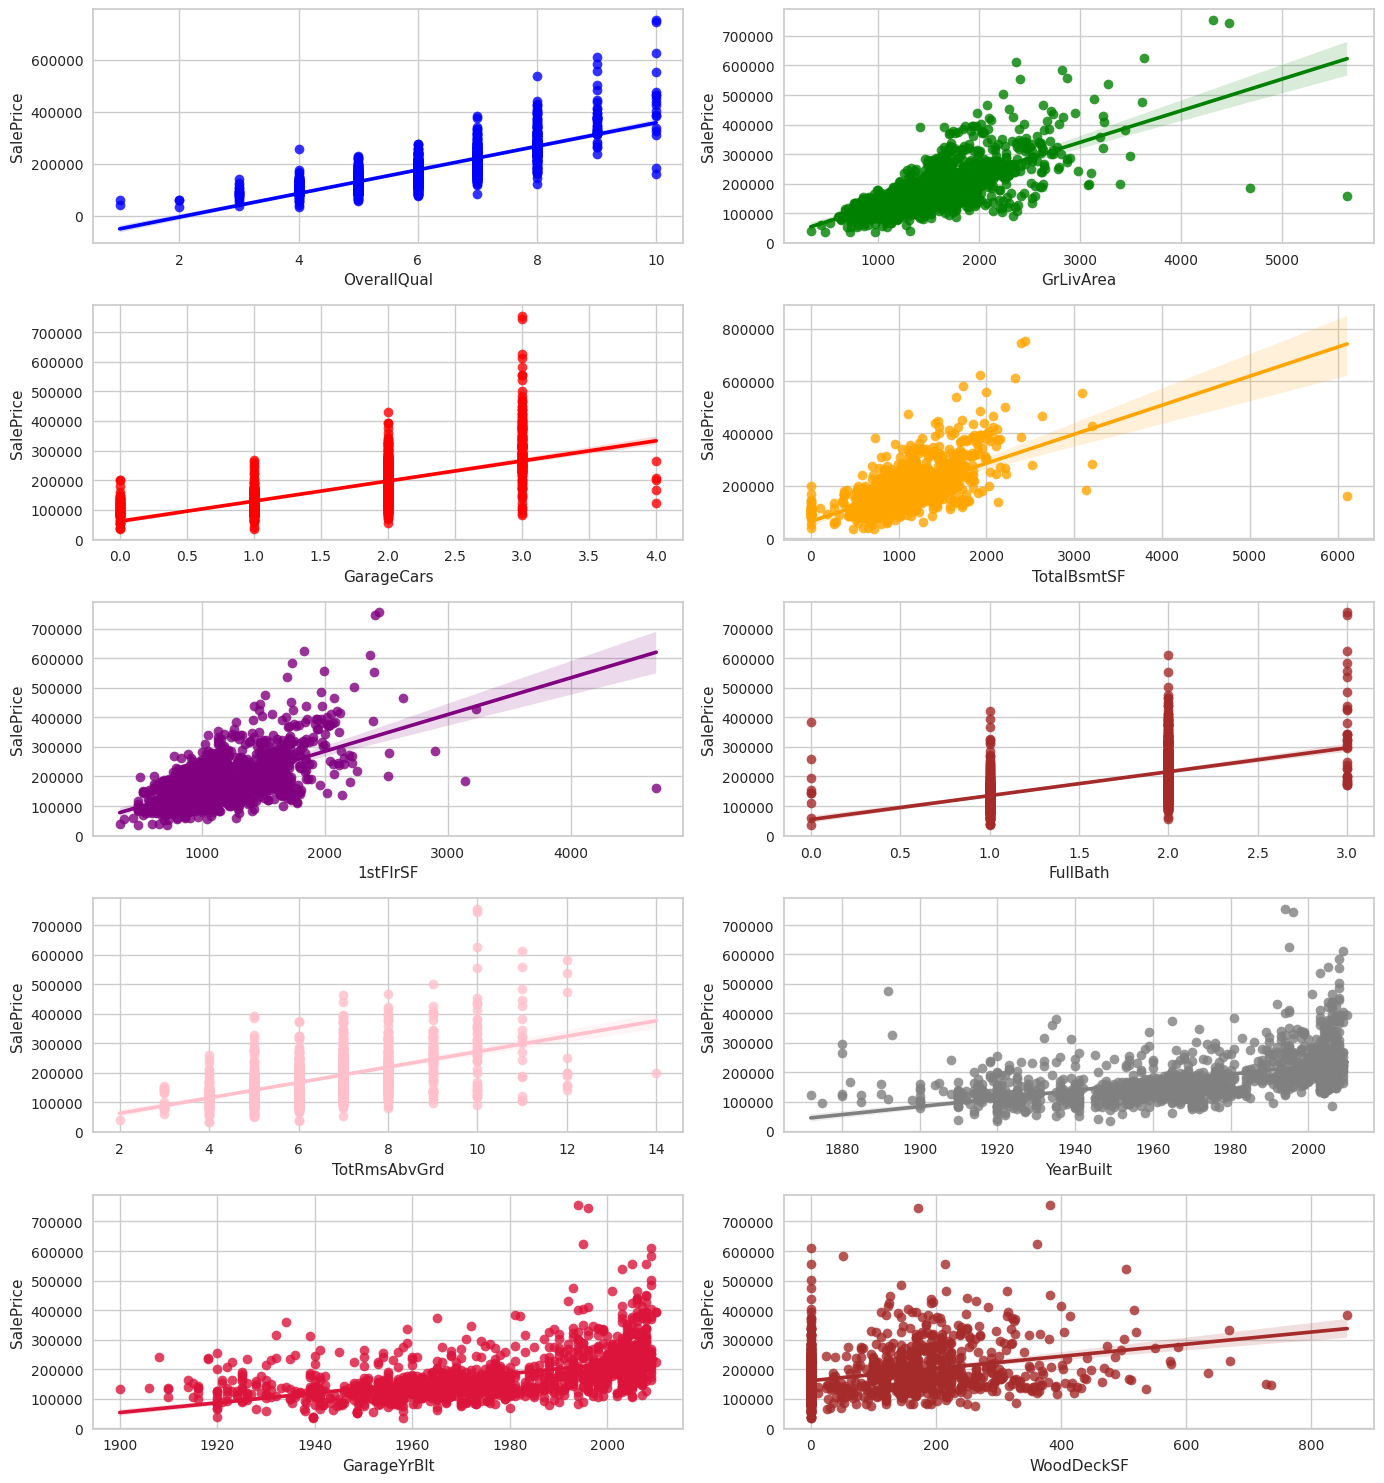

In [41]:
# Define colors for each plot
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'crimson', 'brown']

# Draw scatter plots of columns with highest correlation with target
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(14,15))

sns.regplot(x='OverallQual', y='SalePrice', data=df4, scatter=True, fit_reg=True, ax=ax1, color=colors[0])
sns.regplot(x='GrLivArea', y='SalePrice', data=df4, scatter=True, fit_reg=True, ax=ax2, color=colors[1])
sns.regplot(x='GarageCars', y='SalePrice', data=df4, scatter=True, fit_reg=True, ax=ax3, color=colors[2])
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=df4, scatter=True, fit_reg=True, ax=ax4, color=colors[3])
sns.regplot(x='1stFlrSF', y='SalePrice', data=df4, scatter=True, fit_reg=True, ax=ax5, color=colors[4])
sns.regplot(x='FullBath', y='SalePrice', data=df4, scatter=True, fit_reg=True, ax=ax6, color=colors[5])
sns.regplot(x='TotRmsAbvGrd', y='SalePrice', data=df4, scatter=True, fit_reg=True, ax=ax7, color=colors[6])
sns.regplot(x='YearBuilt', y='SalePrice', data=df4, scatter=True, fit_reg=True, ax=ax8, color=colors[7])
sns.regplot(x='GarageYrBlt', y='SalePrice', data=df4, scatter=True, fit_reg=True, ax=ax9, color=colors[8])
sns.regplot(x='WoodDeckSF', y='SalePrice', data=df4, scatter=True, fit_reg=True, ax=ax10, color=colors[9])

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()


## Analysis Summary

The code generates scatter plots for the columns with the highest correlation with the target variable, 'SalePrice'. Each subplot represents a different feature plotted against the target variable.

Key points from the scatter plots:

1. **OverallQual vs. SalePrice**: There is a positive linear relationship between overall quality and sale price, indicating that higher quality properties tend to have higher sale prices.

2. **GrLivArea vs. SalePrice**: There is a strong positive correlation between the above-ground living area and sale price, suggesting that larger living areas generally command higher prices.

3. **GarageCars vs. SalePrice**: The number of cars that can fit into the garage shows a positive correlation with sale price, indicating that properties with larger garage capacities tend to have higher prices.

4. **TotalBsmtSF vs. SalePrice**: Total basement square footage has a positive correlation with sale price, indicating that properties with larger basements tend to have higher prices.

5. **1stFlrSF vs. SalePrice**: The square footage of the first floor shows a positive correlation with sale price, suggesting that larger first floors generally command higher prices.

6. **FullBath vs. SalePrice**: The number of full bathrooms has a positive correlation with sale price, indicating that properties with more bathrooms tend to have higher prices.

7. **TotRmsAbvGrd vs. SalePrice**: Total rooms above ground show a positive correlation with sale price, suggesting that properties with more rooms generally command higher prices.

8. **YearBuilt vs. SalePrice**: There is a positive correlation between the year the property was built and sale price, indicating that newer properties tend to have higher prices.

9. **GarageYrBlt vs. SalePrice**: The year the garage was built shows a positive correlation with sale price, suggesting that newer garages may contribute to higher property prices.

10. **WoodDeckSF vs. SalePrice**: The square footage of wood deck area shows a positive correlation with sale price, indicating that properties with larger deck areas tend to have higher prices.

Overall, these scatter plots provide insights into the relationship between various features and the target variable, helping to identify important predictors of sale price.


## Box Plots

<Axes: xlabel='SalePrice'>

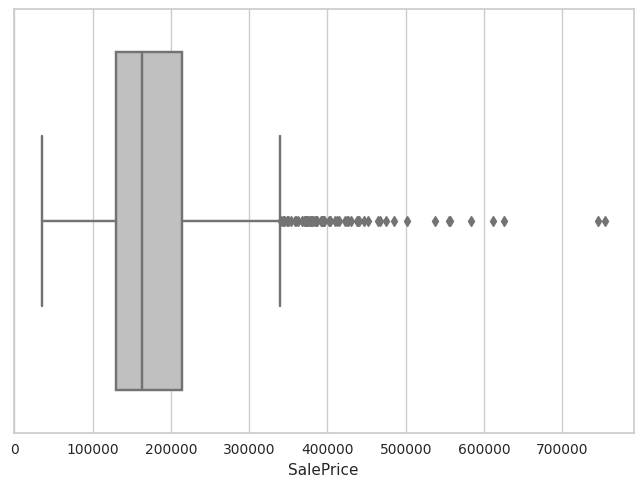

In [42]:
sns.boxplot(x=df4['SalePrice'], color = 'silver')

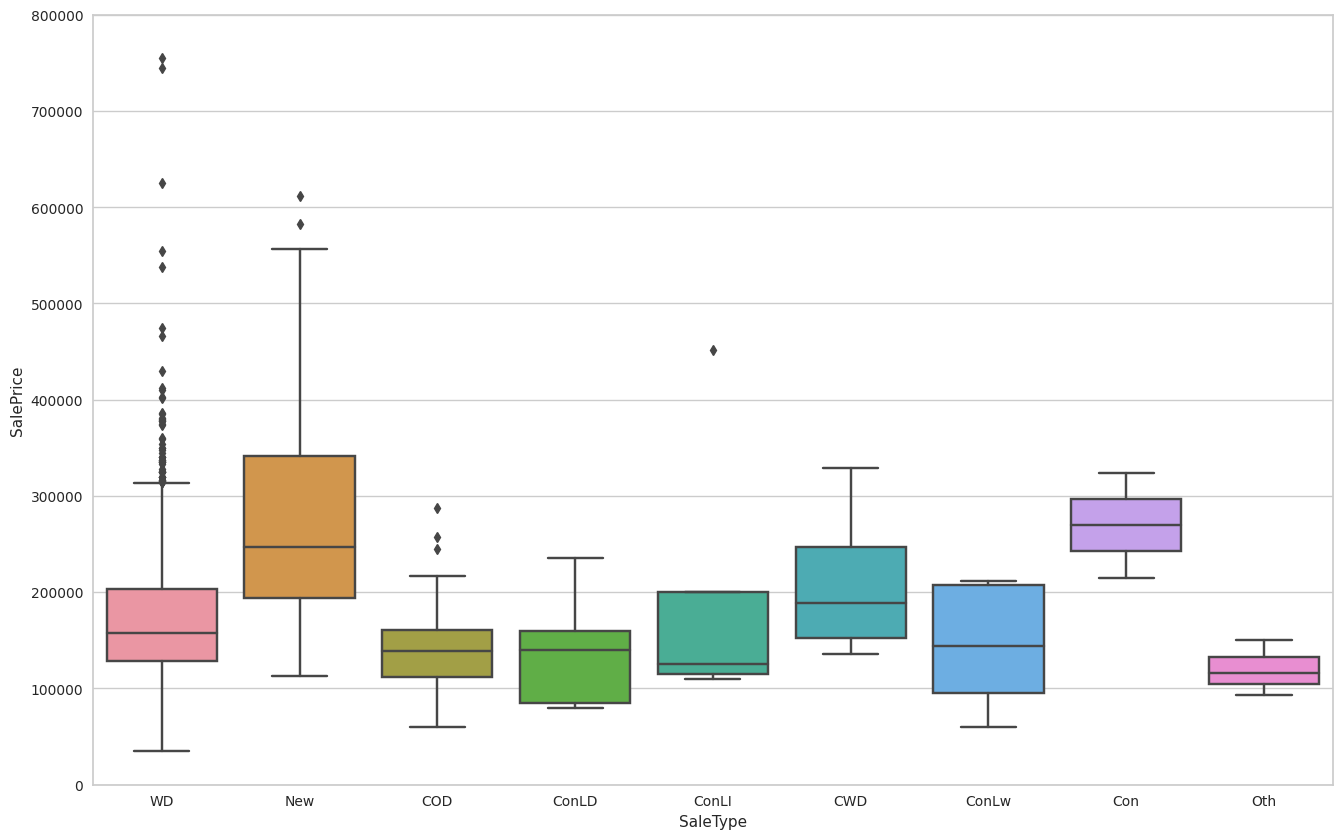

In [43]:
f, ax = plt.subplots(figsize=(16,10))
fig = sns.boxplot(x='SaleType', y='SalePrice', data = df4)
fig.axis(ymin=0, ymax=800000)
xt = plt.xticks(rotation=0)

(-0.5, 9.5, 0.0, 800000.0)

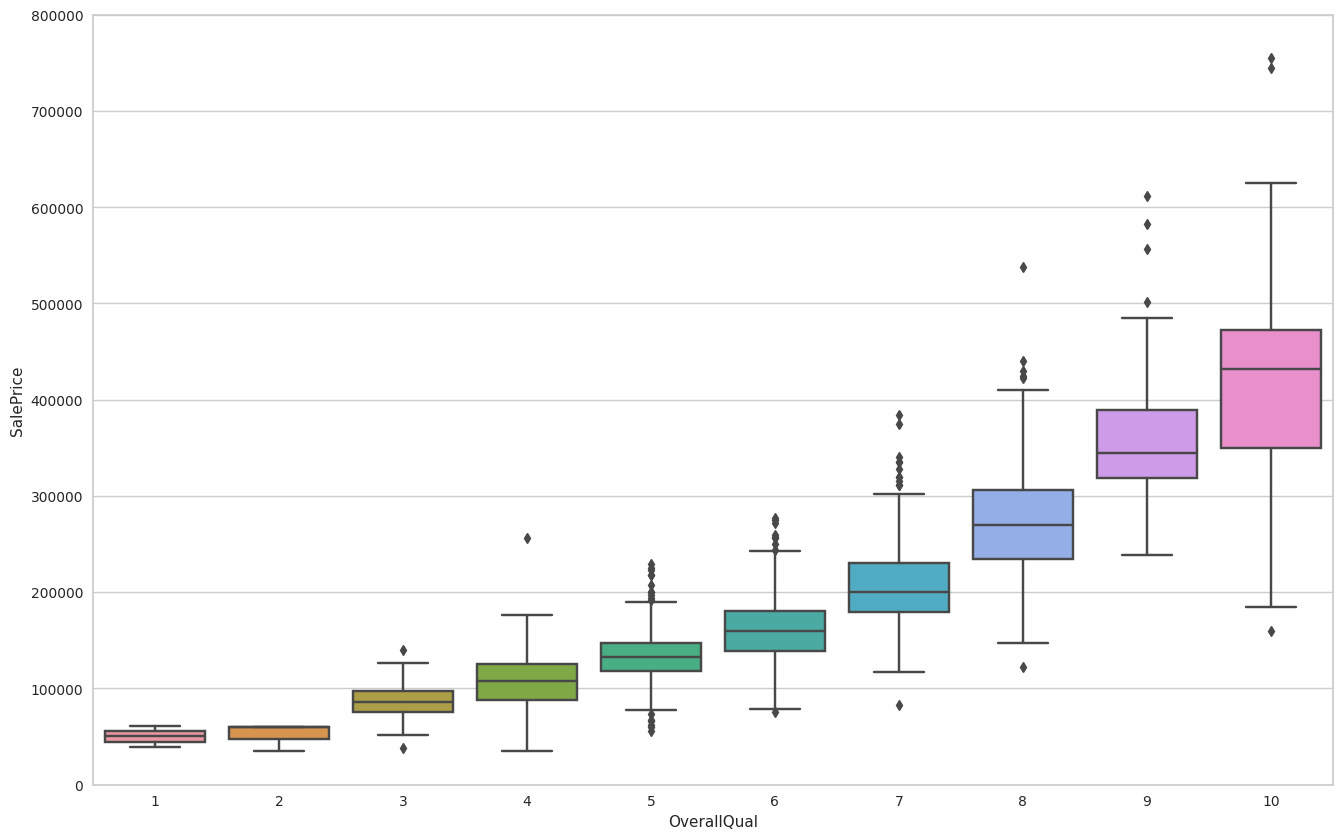

In [44]:
f, ax = plt.subplots(figsize=(16,10))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=df4)
fig.axis(ymin=0, ymax=800000)

## Analysis Summary of Box Plots

### Box Plot for SalePrice Distribution
The first box plot shows the distribution of sale prices. The median sale price appears to be around 160,000 USD with a significant number of outliers indicating higher-priced properties. The interquartile range (IQR) suggests that the majority of properties fall within the 130,000 USD to 215,000 USD range.

### Box Plot for SaleType vs. SalePrice
This box plot compares the sale prices across different sale types. Notable observations include:
- Properties sold through New Homes (New) tend to have higher median sale prices compared to other sale types.
- Sale prices for Court Officer Deed/Estate (CWD) and Condominiums (Con) show considerable variability, with a wider range of prices and numerous outliers.

### Box Plot for OverallQual vs. SalePrice
This box plot examines how sale prices vary with overall quality ratings. Key insights include:
- There is a clear positive correlation between overall quality and sale price, with higher quality properties commanding higher prices.
- Properties with an overall quality rating of 10 have the highest median sale price, indicating that exceptional quality leads to higher property values.
- As overall quality increases, the number of outliers also increases, suggesting that higher-quality properties may exhibit greater variability in sale prices.

Overall, these box plots provide valuable insights into the distribution of sale prices and how they vary across different sale types and property quality ratings.


# Feature Engineering

### 1. Neighborhood Score
We will create a new feature called "Neighborhood Score" based on the average sale price of properties within each neighborhood. This score will provide insight into the desirability and perceived value of properties in different neighborhoods.

### 2. House Age
The "House Age" feature will represent the age of each property by subtracting the year it was built from the current year. This will provide information on the relative age of the property, which can be a significant factor in determining its value.

### 3. SqFtPerRoom
The "SqFtPerRoom" feature will calculate the average square footage per room in each property. This metric can indicate the spaciousness and layout efficiency of a home, which can influence its perceived value.

### 4. Total Home Quality
We will aggregate the quality ratings of various features (such as OverallQual, ExterQual, KitchenQual, etc.) to create a composite "Total Home Quality" score. This score will provide a comprehensive assessment of the overall quality of the property.

### 5. Total Bathrooms
The "Total Bathrooms" feature will sum the number of full bathrooms and half bathrooms in each property. This metric will capture the overall bathroom count, which is an essential factor for many homebuyers.

### 6. High Quality SqFt
The "High Quality SqFt" feature will represent the total square footage of high-quality living spaces, such as those with above-average quality ratings. This metric will highlight the premium living areas within each property, which can significantly impact its value.


In [45]:
df4['Neighborhoodscore'] = df4['Neighborhood'].map(df4['Neighborhood'].value_counts())

df4['HouseAge'] = df4['YrSold'] - df4['YearBuilt']

df4["SqFtPerRoom"] = df4["GrLivArea"] / (df4["TotRmsAbvGrd"] + df4["FullBath"] + df4["HalfBath"] + df4["KitchenAbvGr"])

df4['Total_Home_Quality'] = df4['OverallQual'] + df4['OverallCond']

df4['Total_Bathrooms'] = (df4['FullBath'] + (0.5 * df4['HalfBath']) + df4['BsmtFullBath'] + (0.5 * df4['BsmtHalfBath']))

df4["HighQualSF"] = df4["1stFlrSF"] + df4["2ndFlrSF"]

In [46]:
df_test4['Neighborhoodscore'] = df_test4['Neighborhood'].map(df_test4['Neighborhood'].value_counts())
                                                             
df_test4['HouseAge'] = df_test4['YrSold'] - df_test4['YearBuilt']

df_test4["SqFtPerRoom"] = df_test4["GrLivArea"] / (df_test4["TotRmsAbvGrd"] + df_test4["FullBath"] + df_test4["HalfBath"] + df_test4["KitchenAbvGr"])

df_test4['Total_Home_Quality'] = df_test4['OverallQual'] + df_test4['OverallCond']

df_test4['Total_Bathrooms'] = (df_test4['FullBath'] + (0.5 * df_test4['HalfBath']) + df_test4['BsmtFullBath'] + (0.5 * df_test4['BsmtHalfBath']))

df_test4["HighQualSF"] = df_test4["1stFlrSF"] + df_test4["2ndFlrSF"]

# Log Transform for Skewed Features

To address skewness in certain features, we will apply a log transformation. This transformation helps to normalize the distribution of skewed features, making them more suitable for linear models.

We will utilize three separate DataFrames for different stages of model development:

1. `dfx`: This DataFrame includes transformations applied to the original dataset (`df`) and subsequent cleaning steps (`df4`, `df5`, `df6`, `df7`), and it will be used for the final model.

2. `df5_b`: This DataFrame specifically focuses on creating a base model and incorporates transformations up to the `df5` stage.

3. `df_testx`: This DataFrame comprises the test data and will be utilized for final model evaluation.

By segregating the data into these distinct DataFrames, we can effectively manage the feature engineering and modeling processes while ensuring consistency and reproducibility in our analysis.


In [47]:
# Assign target to SalePrice data
target = df['SalePrice']

In [48]:
# Drop SalePrice from data frame
df4 = df4.drop(['SalePrice'], axis = 1)

In [49]:
df5 = df4.copy()
df_test5 = df_test4.copy()

In [50]:
df5_b = df4.copy()

### Check Skeweness

In [51]:
skew_df = pd.DataFrame(df5.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df5[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,LotFrontage,2.019251,2.019251,True
1,LotArea,12.195142,12.195142,True
2,OverallQual,0.216721,0.216721,False
3,OverallCond,0.692355,0.692355,True
4,YearBuilt,-0.612831,0.612831,True
5,YearRemodAdd,-0.503044,0.503044,True
6,MasVnrArea,2.663152,2.663152,True
7,BsmtFinSF1,1.683771,1.683771,True
8,BsmtFinSF2,4.250888,4.250888,True
9,BsmtUnfSF,0.919323,0.919323,True


In [52]:
# Reduce skeweness using log1 scale
for col in skew_df.query('Skewed == True')['Feature'].values:
    df5[col] = np.log1p(df5[col]) # We use log1p since data has 0 values and log will not work on this case

In [53]:
skew_df = pd.DataFrame(df5.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df5[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,LotFrontage,-0.789832,0.789832,True
1,LotArea,-0.137263,0.137263,False
2,OverallQual,0.216721,0.216721,False
3,OverallCond,-0.253754,0.253754,False
4,YearBuilt,-0.640470,0.640470,True
5,YearRemodAdd,-0.510480,0.510480,True
6,MasVnrArea,0.481270,0.481270,False
7,BsmtFinSF1,-0.617774,0.617774,True
8,BsmtFinSF2,2.521100,2.521100,True
9,BsmtUnfSF,-2.184257,2.184257,True


# Encoding Categorical Variables

In this section, we address the handling of categorical variables within the dataset. Categorical variables, which represent qualitative data and often take on non-numeric values, require special treatment for effective integration into machine learning models.

Our approach involves encoding these categorical variables into numerical representations, as most machine learning algorithms require numerical input data. We will explore various encoding techniques, such as one-hot encoding, label encoding, and target encoding, to transform categorical variables into a format that can be readily utilized by our models.

By appropriately encoding categorical variables, we ensure that valuable information captured by these features is effectively incorporated into our predictive models, ultimately enhancing their performance and predictive accuracy.
g

In [54]:
df6 = df5.copy() 
df_test6 = df_test5.copy()

In [55]:
df5_b = pd.get_dummies(df5_b) # Base DataFrame After Encoding, Before Scaling

In [56]:

df6 = pd.get_dummies(df6) # Final Model DataFrame Sequence CheckPoint After Encoding, Before Scaling

In [57]:
df_test6 = pd.get_dummies(df_test6) # Test DataFrame Sequence CheckPoint After Encoding, Before Scaling

In [58]:
df6.shape

(1460, 320)

In [59]:
df5_b.shape

(1460, 320)

In [60]:
df_test6.shape

(1459, 302)

### We have 18 columns that need to be dropped to maintain consistency among the three DataFrames.

In [61]:
# Get the columns that are present in df6 but not in df_test6
missing_columns_df_test6 = df6.columns.difference(df_test6.columns)

# Get the columns that are present in df_test6 but not in df6
missing_columns_df6 = df_test6.columns.difference(df6.columns)

# Concatenate the two sets of columns
different_columns = missing_columns_df_test6.union(missing_columns_df6)

# Drop the columns that are different between df6, df_test6 and df5_b
df6 = df6.drop(columns=different_columns, errors='ignore')
df_test6 = df_test6.drop(columns=different_columns, errors='ignore')
df5_b = df5_b.drop(columns=different_columns, errors='ignore')


# Check again for any remaining differences
different_columns_after_drop = df6.columns.difference(df_test6.columns).union(df_test6.columns.difference(df6.columns))

print("Columns that are different between df6 and df_test6 after dropping:")
print(different_columns_after_drop)


Columns that are different between df6 and df_test6 after dropping:
Index([], dtype='object')


In [62]:
df6.shape

(1460, 302)

In [63]:
df5_b.shape

(1460, 302)

In [64]:
df_test6.shape

(1459, 302)

### All DataFrames have been reduced to the same number of columns.

# Scaling

In [65]:
scaler = StandardScaler()
scaler.fit(df6) # Scale df6

df6 = pd.DataFrame(scaler.transform(df6), index=df6.index, columns = df6.columns) # We can scale this way since this is a competition data set. Production data sets requires a different approach.

In [66]:
scaler = StandardScaler()
scaler.fit(df_test6) # Scale df_test6

df_test6 = pd.DataFrame(scaler.transform(df_test6), index=df_test6.index, columns = df_test6.columns) # We can scale this way since this is a competition data set. Production data sets requires a different approach.

In [67]:
scaler = StandardScaler()
scaler.fit(df5_b) # Scale df5_b

df5_b = pd.DataFrame(scaler.transform(df5_b), index=df5_b.index, columns = df5_b.columns) # We can scale this way since this is a competition data set. Production data sets requires a different approach.

## Target Transform

### Check and Optimize Skeweness for Target

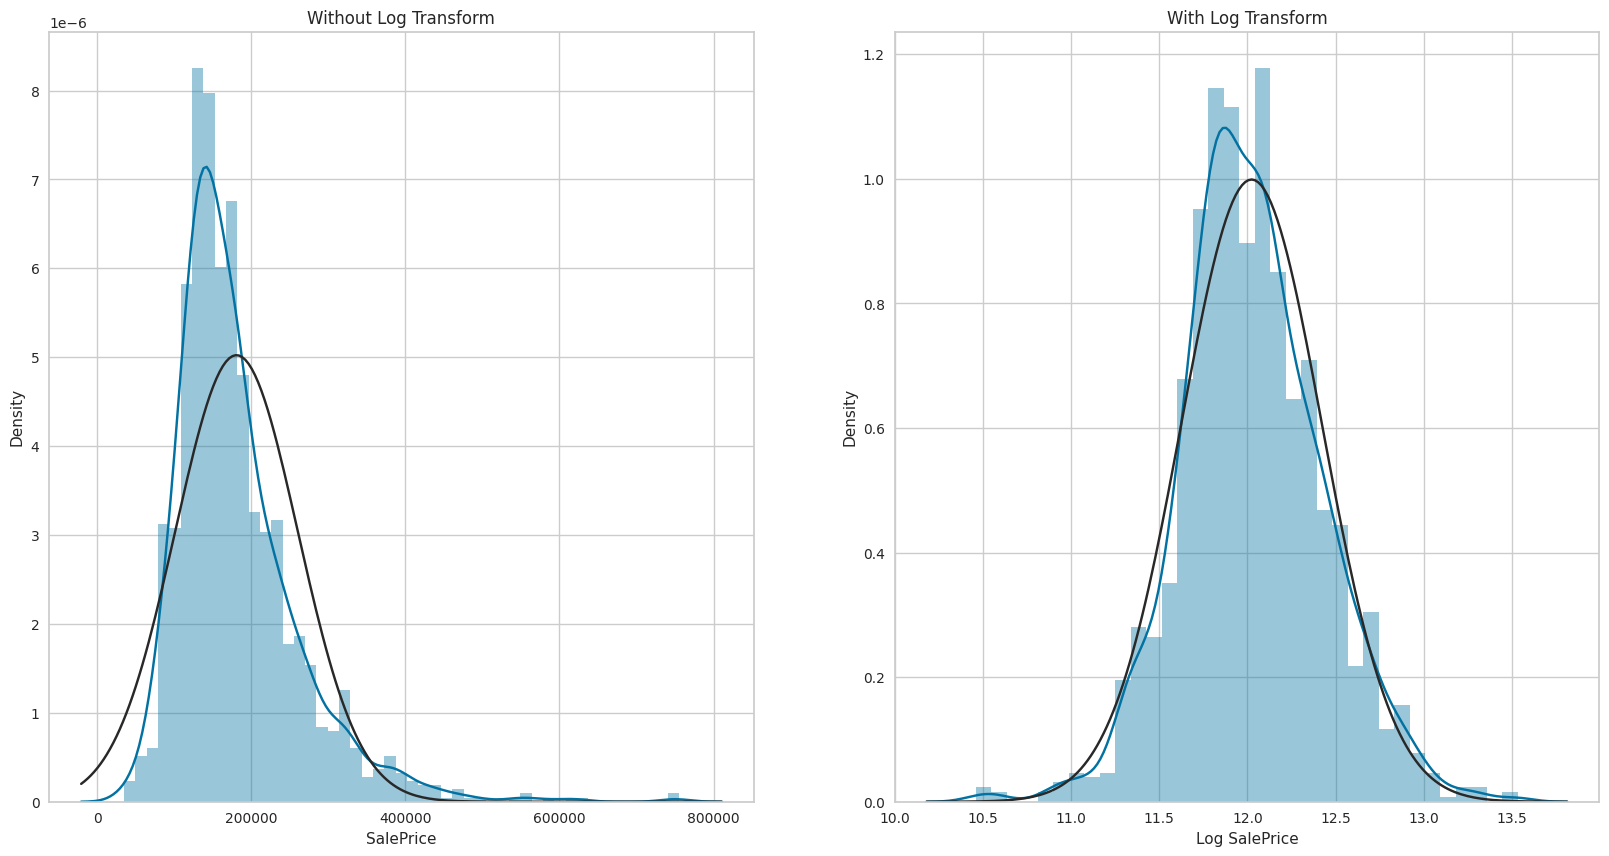

In [68]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm) # Chart with target
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm) # Chart with np.log(target)
plt.xlabel("Log SalePrice")
plt.title("With Log Transform")

plt.show()

### Transform target to logarithmic scale for improved model accuracy

In [69]:
log_target = np.log(target)

## Model Selection

In [70]:
df7 = df6.copy()
df_test7 = df_test6.copy()

In [71]:
# _base = setup(data=pd.concat([df5_b, target], axis = 1), target='SalePrice') # Setup Base Model for Compare_Models()

In [72]:
# compare_models() # Base Model Results - Original Scale

### Base Model Comparison Results

| Model   | Algorithm                        | MAE     | MSE            | RMSE     | R2      | RMSLE   | MAPE    | TT (Sec) |
|---------|----------------------------------|---------|----------------|----------|---------|---------|---------|----------|
| rf      | Random Forest Regressor          | 17465.71| 883535086.6411 | 28643.82 | 0.8588  | 0.1423  | 0.1018  | 3.0860   |
| en      | Elastic Net                      | 17442.32| 969921307.9781 | 30608.55 | 0.8442  | 0.1471  | 0.0990  | 0.1710   |
| et      | Extra Trees Regressor            | 18084.11| 1016922336.7136| 30753.60 | 0.8381  | 0.1451  | 0.1037  | 3.1400   |
| llar    | Lasso Least Angle Regression     | 17330.21| 1068095990.7947| 31516.54 | 0.8256  | 0.1694  | 0.0990  | 0.1820   |
| br      | Bayesian Ridge                   | 18109.04| 1078690939.5830| 32087.31 | 0.8234  | 0.1806  | 0.1055  | 0.2920   |
| omp     | Orthogonal Matching Pursuit      | 18848.16| 1114194713.1411| 32375.81 | 0.8177  | 0.1878  | 0.1114  | 0.1370   |
| ada     | AdaBoost Regressor               | 23403.54| 1223525884.9374| 34212.08 | 0.8047  | 0.1921  | 0.1512  | 0.5380   |
| huber   | Huber Regressor                  | 18654.49| 1255935152.4894| 34199.43 | 0.7915  | 0.2120  | 0.1117  | 0.5150   |
| par     | Passive Aggressive Regressor     | 20487.04| 1590317308.9775| 38851.88 | 0.7479  | 0.2669  | 0.1252  | 1.0510   |
| ridge   | Ridge Regression                 | 20367.30| 1577426230.5234| 38186.03 | 0.7375  | 0.2450  | 0.1218  | 0.1660   |
| knn     | K Neighbors Regressor           | 25504.64| 1838030835.5396| 42283.13 | 0.7174  | 0.1947  | 0.1404  | 0.0790   |
| dt      | Decision Tree Regressor         | 27715.41| 2081641669.8858| 44186.93 | 0.6720  | 0.2115  | 0.1545  | 0.1240   |
| lasso   | Lasso Regression                | 21641.85| 3426809426.8291| 48484.40 | 0.4377  |         |         |          |

### Summary and Analysis

The base model comparison results provide insights into the performance of different regression algorithms. Among these models, the Random Forest Regressor (rf) exhibits the lowest Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), indicating better predictive performance and lower error rates compared to other models. Additionally, it achieves a relatively high R-squared (R2) value, indicating a good fit to the data. Therefore, the Random Forest Regressor may be considered as a strong candidate for the final model selection. However, further analysis and evaluation, including considering computational efficiency and model interpretability, may be necessary before making a final decision.


In [73]:
# _ = setup(data=pd.concat([df7, log_target], axis = 1), target='SalePrice') # Setup Final Model for Compare_Models()

In [74]:
# compare_models() # Final Model Logarithmic Scale Results

### Final Model Comparison Results

| Model   | Algorithm                          | MAE   | MSE   | RMSE  | R2    | RMSLE | MAPE  | TT (Sec) |
|---------|------------------------------------|-------|-------|-------|-------|-------|-------|----------|
| catboost| CatBoost Regressor                 | 0.0784| 0.0143| 0.1175| 0.9092| 0.0091| 0.0066| 4.1710   |
| gbr     | Gradient Boosting Regressor        | 0.0881| 0.0173| 0.1295| 0.8907| 0.0101| 0.0074| 1.0190   |
| lightgbm| Light Gradient Boosting Machine    | 0.0918| 0.0179| 0.1323| 0.8865| 0.0103| 0.0077| 0.3560   |
| br      | Bayesian Ridge                     | 0.0885| 0.0186| 0.1343| 0.8807| 0.0104| 0.0074| 0.2020   |
| rf      | Random Forest Regressor            | 0.0962| 0.0195| 0.1379| 0.8767| 0.0107| 0.0081| 3.0140   |
| et      | Extra Trees Regressor              | 0.0965| 0.0197| 0.1391| 0.8755| 0.0108| 0.0081| 3.1460   |
| xgboost | Extreme Gradient Boosting          | 0.0983| 0.0208| 0.1424| 0.8685| 0.0111| 0.0082| 0.8880   |
| omp     | Orthogonal Matching Pursuit        | 0.0954| 0.0223| 0.1472| 0.8575| 0.0114| 0.0080| 0.1310   |
| ridge   | Ridge Regression                   | 0.0947| 0.0233| 0.1503| 0.8500| 0.0118| 0.0079| 0.1520   |
| ada     | AdaBoost Regressor                 | 0.1274| 0.0292| 0.1698| 0.8154| 0.0132| 0.0106| 0.5760   |
| knn     | K Neighbors Regressor              | 0.1400| 0.0389| 0.1966| 0.7519| 0.0152| 0.0117| 0.0840   |
| dt      | Decision Tree Regressor            | 0.1472| 0.0441| 0.2077| 0.7192| 0.0162| 0.0123| 0.1200   |
| lasso   | Lasso Regression                   | 0.3080| 0.1582| 0.3973| -0.0101| 0.0305| 0.0256| 0.1340   |

### Summary and Analysis

Based on the model comparison results, several algorithms have performed well in terms of metrics such as MAE, MSE, RMSE, R2, RMSLE, and MAPE. The CatBoost Regressor stands out as it has the lowest MAE, MSE, RMSE, and RMSLE values, along with the highest R2 value among all models, indicating better predictive performance. Additionally, the Bayesian Ridge model also shows promising results with relatively low error metrics and a high R2 value. However, it's important to consider other factors such as computational efficiency (TT - Time Taken) and ease of implementation. In this context, the Bayesian Ridge model might be preferred due to its good balance between performance and computational efficiency.


In [75]:
final = BayesianRidge(verbose=0)

In [76]:
final.fit(df7, log_target)

BayesianRidge(verbose=0)

### Cross Validation for Final Model

In [77]:
cross_val_score(final, df7, log_target, scoring='neg_mean_squared_error')

array([-0.01333671, -0.01958266, -0.02147475, -0.01322783, -0.02198949])

In [78]:
# Replace whitespace in feature names with underscores
df7.columns = df7.columns.str.replace(' ', '_')


In [79]:
cross_val_score(final, df7, log_target, scoring='neg_mean_squared_error')

array([-0.01333671, -0.01958266, -0.02147475, -0.01322783, -0.02198949])

### KFold For Final Model

In [80]:
kf = KFold(n_splits=10)

results = cross_val_score(final, df7, log_target, scoring='neg_mean_squared_error', cv=kf)

In [81]:
results

array([-0.01421437, -0.01021716, -0.01471471, -0.0230719 , -0.02103611,
       -0.01739493, -0.01521809, -0.01114313, -0.03147529, -0.02051503])

## Prediction

In [82]:
test_ids = df_test['Id']
test_ids

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

### Predict test

In [83]:
predictions = np.exp(final.predict(df_test7))

submission = pd.concat([test_ids, pd.Series(predictions, name='SalePrice')], axis=1)
submission

,Id,SalePrice
0,1461,113787.746589
1,1462,146774.449716
2,1463,179597.074212
3,1464,198110.058830
4,1465,192519.094436
...,...,...
1454,2915,95835.444347
1455,2916,86877.370382
1456,2917,177113.364350
1457,2918,119306.517025


In [84]:
submission.to_csv('./submission.csv', index = False, header = True)